In [1]:
from AIChatRenpy import AIChat
chat = AIChat(preprompt_key="evaluation")

In [7]:
import json
from PIL import Image, ImageDraw, ImageFont, ImageColor, ImageFilter
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
options = webdriver.ChromeOptions()
from time import sleep
from bs4 import BeautifulSoup
import requests
from selenium.webdriver.chrome.options import Options

In [5]:
reponse = chat.talk("""
Verso : La verite fondamentale de l'existence est la souffrance
Recto : Regarde le soleil est beau
""")
reponse = reponse.replace("```","").replace("json","")
# transform string to dic
dic = json.loads(reponse)
print(dic)

{'topic': 'beauté vs souffrance', 'emotion': 'persuasion douce', 'impact_message': 70, 'raisonnement_note': "Recto tente de réfuter le déterminisme de Verso par une observation du monde extérieur, apportant une perspective alternative basée sur l'esthétique, ce qui est cohérent avec sa posture."}


In [8]:
js = """
{"topic": "La résignation du dénouement", "emotion": "Acceptation", "impact_message": "6"}
"""


In [9]:
json = json.loads(js)

In [5]:
def convert_roman(chiffre):
    romain = {1: 'I',
        2: 'II',
        3: 'III',
        4: 'IV',
        5: 'V',
        6: 'VI',
        7: 'VII',
        8: 'VIII',
        9: 'IX',
        10: 'X'}
    return romain[chiffre]

In [8]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
options = webdriver.ChromeOptions()
from time import sleep
from bs4 import BeautifulSoup
import requests
from selenium.webdriver.chrome.options import Options



In [ ]:
chrome_options = Options()
chrome_options.add_argument("--headless=new")
chrome_options.add_argument('--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36')
driver = webdriver.Chrome(
service=Service(ChromeDriverManager().install()),
options=chrome_options
)
nom_image = "anxiety"


In [ ]:
def dl_image(image):
    image = image.replace(' ','+')
    url = f"https://fr.freepik.com/search?ai=only&format=search&last_filter=type&last_value=illustration&query={image}&type=illustration"
    driver.get(url)
    sleep(1)
    img = driver.find_element("xpath", "//img")
    src = img.get_attribute("src")
    response = requests.get(src)
    with open(f"temp.jpg", 'wb') as f:
        f.write(response.content)

In [20]:
src

'https://img.freepik.com/free-photo/fantastic-illustration-ancient-chinese-themes_456031-89.jpg?semt=ais_hybrid&w=740&q=80'

In [82]:
def dl_image(nom_image):
    print("Carte tirée :", nom_image)
    url = f"https://www.freepik.com/search?format=search&last_filter=query&last_value=wallpaper+emeraude&query={nom_image.replace(' ','+')}"
    headers = {"User-Agent": "Mozilla/5.0"}
    print(url)
    r = requests.get(url, headers=headers)
    print(r.text)
    soup = BeautifulSoup(r.text, "html.parser")
    imgs = soup.find_all("img")
    # la première vraie image (on saute le logo Google)
    i=0
    for im in imgs:
        i+=1
        src = im.get("src")
        if src and src.startswith("http"):
            r = requests.get(src)
            open(f"temp{i}.jpg", "wb").write(r.content)

In [83]:
dl_image("background Dragon maudit")

Carte tirée : background Dragon maudit
https://www.freepik.com/search?format=search&last_filter=query&last_value=wallpaper+emeraude&query=background+Dragon+maudit
<!DOCTYPE html>
<html lang="es">

<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width,initial-scale=1.0">
  <title>Access denied</title>
  <link rel="icon" type="image/x-icon" href="https://fps.cdnpk.net/favicons/favicon.ico">
  <link rel="icon" type="image/png" href="https://fps.cdnpk.net/favicons/favicon-32x32.png" sizes="32x32">
  <link rel="icon" type="image/png" href="https://fps.cdnpk.net/favicons/favicon-16x16.png" sizes="16x16">
  <link rel="shortcut icon" type="image/x-icon" href="https://fps.cdnpk.net/favicons/favicon-96x96.png">
  <link rel="icon" type="image/x-icon" href="https://fps.cdnpk.net/favicons/favicon-96x96.png" sizes="96x96">
  <link rel="apple-touch-icon-precomposed" href="https://fps.cdnpk.net/favicons/apple-icon-57x57.png" sizes="57x57">
  <link rel="apple-touch-icon-pr

In [71]:
def create_tcg_card(
    card_name: str,
    art_name: str,
    background_path: str = "rainbow.jpg",
    output_path: str = "carte_nom.png",
    tint_color: str = "blue",
    power: int = 10,
    size: tuple = (630, 880),
    border_ratio: float = 0.015,  # ratio instead of px
    font_dir: str = "fonts"
):
    """Crée une carte TCG stylisée avec fond, teinte, image et textes.
    Tous les éléments sont redimensionnés proportionnellement à la taille de la carte.
    """

    width, height = size

    # --- ÉCHELLES (ratios adaptatifs) ---
    border_thickness = int(min(width, height) * border_ratio)
    margin = int(width * 0.05)
    font_size = int(height * 0.06)
    small_gap = int(height * 0.015)
    banner_height = int(height * 0.005)
    image_top_offset = int(height * 0.05)
    image_height = int(height * 0.45)

    # --- FOND + TEINTE ---
    background = Image.open(background_path).convert("RGB").resize((width, height))
    tint_rgb = ImageColor.getrgb(tint_color)
    color_layer = Image.new("RGB", (width, height), tint_rgb)
    card = Image.blend(background, color_layer, alpha=0.4)

    draw = ImageDraw.Draw(card)

    # --- CONTOUR ---
    # Gold frame
    gold =  (30, 30, 30) 
    shadow =  (270, 270, 270)
    draw.rectangle([0, 0, width, height], outline=shadow, width=border_thickness*2)
    draw.rectangle(
        [border_thickness, border_thickness, width-border_thickness, height-border_thickness],
        outline=gold,
        width=border_thickness
    )

    # --- TITRE ---
    try:
        font = ImageFont.truetype("fonts/merriweather.ttf", font_size)
    except:
        font = ImageFont.load_default()

    bbox = draw.textbbox((0, 0), card_name, font=font)
    text_w, text_h = bbox[2] - bbox[0], bbox[3] - bbox[1]

    x = margin
    y = margin
    draw.text((x, y), card_name, fill=(0, 0, 0), font=font)

    # --- BANNIÈRE / DÉLIMITEUR ---
    banner_y_start = y + text_h + small_gap
    draw.rectangle(
        [margin / 2, banner_y_start, width - margin / 2, banner_y_start + banner_height],
        fill=gold
    )

    # --- IMAGE PRINCIPALE ---
    image_y_start = banner_y_start + image_top_offset
    left = margin
    right = width - margin
    bottom = image_y_start + image_height

    draw.rectangle([left, image_y_start, right, bottom], outline=(0, 0, 0), width=int(border_thickness * 0.3))

    art = Image.open("temp.jpg").convert("RGB")
    art = art.resize((right - left - int(border_thickness * 0.3) , bottom - image_y_start - int(border_thickness * 0.3)))
    card.paste(art, (left + int(border_thickness * 0.3), image_y_start + int(border_thickness * 0.3)))

    # --- PUISSANCE (chiffre romain) ---
    try:
        roman_font = ImageFont.truetype("fonts/cinzel.ttf", int(font_size * 2))
    except:
        roman_font = ImageFont.load_default()

    roman_x = int(width * 0.45)
    roman_y = int(height * 0.68)
    draw.text((roman_x, roman_y), convert_roman(power), fill=(0, 0, 0), font=roman_font)

    # --- EXPORT ---
    card.save(output_path)
    return card

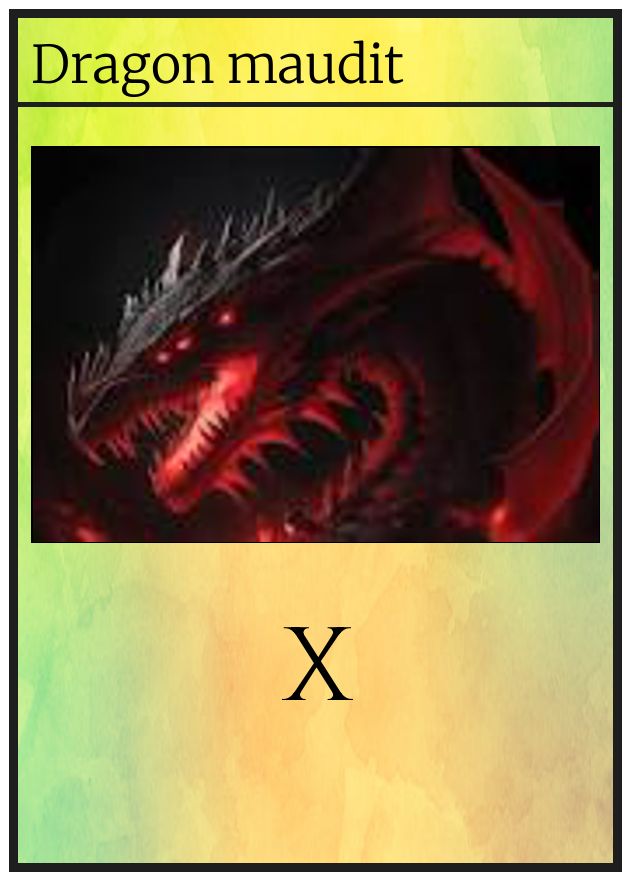

In [72]:
create_tcg_card("Dragon maudit","234002.jpg", tint_color="yellow")